In [86]:
import numpy as np

from pathlib import Path
import re
from random import randint

import tkinter as tk
from tkinter import filedialog

import json
import struct

import matplotlib.pyplot as plt

In [29]:
root = tk.Tk()
root.withdraw()

In [30]:
def get_map_dimensions(file_path:Path):
  """Gets the measured map's dimensions (in pixels) assuming that the filename contains this information

  Args:
      file_path (Path): pathlib.Path object of the considered map's data
  """
  map_dimensions = re.findall(
      '[0-9]{3}x[0-9]{3}',
      file_path.name
  )[0].split('x')

  return([int(x) for x in map_dimensions])

def get_metadata(file_path:Path):
  """Load metadata from the metadata file corresponding to the selected data file

  Args:
      file_path (Path): pathlib.Path object of the considered map's data
  """
  metadata_path = file_path.with_suffix('.libsmetadata')
  if metadata_path.is_file():
    with open(
      file_path.with_suffix('.libsmetadata'),'r'
    ) as file:

      return(json.load(file))
  else:
    raise ImportError('Metadata file is missing')

In [31]:
get_metadata(file_path)

{'data': [{'Index of measurement': '0'},
  {'Index of measurement': '1'},
  {'Index of measurement': '2'},
  {'Index of measurement': '3'},
  {'Index of measurement': '4'},
  {'Index of measurement': '5'},
  {'Index of measurement': '6'},
  {'Index of measurement': '7'},
  {'Index of measurement': '8'},
  {'Index of measurement': '9'},
  {'Index of measurement': '10'},
  {'Index of measurement': '11'},
  {'Index of measurement': '12'},
  {'Index of measurement': '13'},
  {'Index of measurement': '14'},
  {'Index of measurement': '15'},
  {'Index of measurement': '16'},
  {'Index of measurement': '17'},
  {'Index of measurement': '18'},
  {'Index of measurement': '19'},
  {'Index of measurement': '20'},
  {'Index of measurement': '21'},
  {'Index of measurement': '22'},
  {'Index of measurement': '23'},
  {'Index of measurement': '24'},
  {'Index of measurement': '25'},
  {'Index of measurement': '26'},
  {'Index of measurement': '27'},
  {'Index of measurement': '28'},
  {'Index of mea

In [148]:
#%%writefile ../src/MapData.py

class MapData:
  """Class for handling hyperspectral images stored in the .libsdata file format
  """
  def __init__(self):
    self.file_path = Path(
      filedialog.askopenfilename(filetypes=[('LIBS data','*.libsdata')])
    )
    self.BYTE_SIZE = 4


  def get_map_dimensions(self):
    """Gets the measured map's dimensions (in pixels) assuming that the filename contains this information
    """
    map_dimensions = re.findall(
        '[0-9]{3}x[0-9]{3}',
        self.file_path.name
    )[0].split('x')

    self.map_dimensions = [int(x) for x in map_dimensions]


  def get_metadata(self):
    """Load metadata from the metadata file corresponding to the selected data file
    """
    metadata_path = self.file_path.with_suffix('.libsmetadata')
    if metadata_path.is_file():
      with open(
        self.file_path.with_suffix('.libsmetadata'),'r'
      ) as file:

        self.metadata = json.load(file)
    else:
      raise ImportError('Metadata file is missing')
    

  def load_wavelenths(self):
    with open(self.file_path,'rb') as source:        
        self.wvl = []
        
        for _ in range(self.metadata.get('wavelengths')):
          self.wvl.extend(
            struct.unpack(
                'f',source.read(self.BYTE_SIZE)
            )
          )

        self.wvl = np.array(self.wvl)


  def load_batch_of_spectra(self, batch_size, start_ndx):
    with open(self.file_path,'rb') as source:
      source.seek(
        (1 + start_ndx) * self.metadata.get('wavelengths') * self.BYTE_SIZE,
        0
      )

      data = []
      for _ in range(self.metadata.get('wavelengths') * batch_size):

        data.extend(
          struct.unpack(
            'f',source.read(self.BYTE_SIZE)
          )
        )

      self.data = np.reshape(
          data,
          (-1,self.metadata.get('wavelengths'))
      )


  def load_random_spectrum_from_batch(self, batch_size):
    with open(self.file_path,'rb') as source:
      chosen_ndx = randint(0,batch_size)
      source.seek(
        self.metadata.get('wavelengths') * self.BYTE_SIZE * (chosen_ndx + 1),
        0
      )

      data = []
      for _ in range(self.metadata.get('wavelengths')):

        data.extend(
          struct.unpack(
            'f',source.read(self.BYTE_SIZE)
          )
        )

      self.data = np.reshape(
          data,
          (-1,self.metadata.get('wavelengths'))
      )

  
  def load_random_spectrum(self):
    data = []
    with open(self.file_path,'rb') as source:
      chosen_ndx = randint(1,self.metadata.get('spectra'))
      source.seek(
        self.metadata.get('wavelengths') * self.BYTE_SIZE * chosen_ndx,
        0
      )
      for _ in range(self.metadata.get('wavelengths')):
        data.extend(
          struct.unpack(
            'f',source.read(self.BYTE_SIZE)
          )
        )
      return(np.array(data))


  def plot_random_spectrum(self):
    """plot a random spectrum from the file
    """
    fig,ax = plt.subplots()
    if not self.load_wavelenths:
      self.load_wavelenths()

    ax.plot(
      self.wvl,
      self.load_random_spectrum()
    )
    fig.show()

In [149]:
map_data = MapData()
map_data.get_metadata()
map_data.get_map_dimensions()
map_data.load_wavelenths()

In [152]:
map_data.load_batch_of_spectra(254,5143)

In [153]:
map_data.data.shape

(254, 4094)

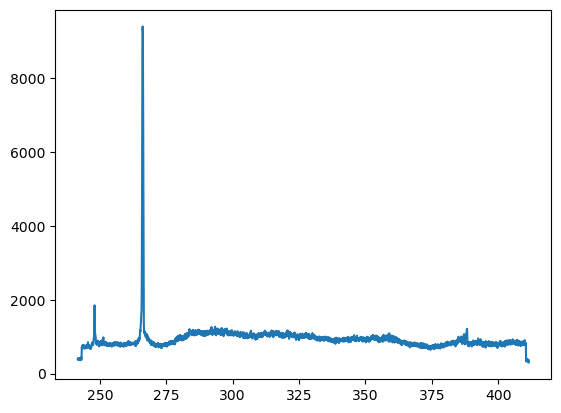

In [105]:
plt.plot(
    map_data.wvl,
    map_data.data[0,:]
)

In [ ]:
file_path = input("Please enter the path of your file: ")

if os.path.isfile(file_path):
    # If the file exists, we can proceed with reading its contents or performing other operations
    print(f"File found at {file_path}")
    with open(file_path, "r") as f:
        # Perform operations on the file here, e.g. reading its contents
        file_contents = f.read()
        print(f"The contents of the file are:\n{file_contents}")
else:
    # If the file does not exist, inform the user and prompt them to try again with a different file path
    print(f"File not found at {file_path}. Please try again with a different file path.")